<a href="https://colab.research.google.com/github/nakib103/pancancer_classification/blob/master/analyze_output_visualization_intermediate_activations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

In [ ]:
# run this cell to mount your Google Drive.

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# load model

from keras.models import load_model

model = load_model("/content/drive/My Drive/results/model_with_weights_2D_2.h5")
model.summary()

In [ ]:
# img_path = 'cat.jpg'

# # We preprocess the image into a 4D tensor
# from keras.preprocessing import image
# import numpy as np

# img = image.load_img(img_path, target_size=(224, 224))
# img_tensor = image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# # Remember that the model was trained on inputs
# # that were preprocessed in the following way:
# img_tensor /= 255.

# # Its shape is (1, 150, 150, 3)
# print(img_tensor.shape)

# load data and label

import numpy as np

data = np.load("/content/drive/My Drive/data/data_np_2D.npy")
label = np.load("/content/drive/My Drive/data/label_np_2D.npy")

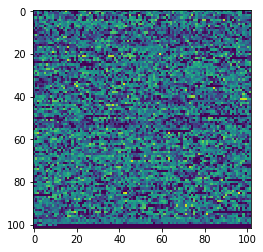

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(data[100,0])
plt.show()

In order to extract the feature maps we want to look at, we will create a Keras model that takes batches of images as input, and outputs 
the activations of all convolution and pooling layers. To do this, we will use the Keras class `Model`. A `Model` is instantiated using two 
arguments: an input tensor (or list of input tensors), and an output tensor (or list of output tensors). The resulting class is a Keras 
model, just like the `Sequential` models that you are familiar with, mapping the specified inputs to the specified outputs. What sets the 
`Model` class apart is that it allows for models with multiple outputs, unlike `Sequential`. For more information about the `Model` class, see 
Chapter 7, Section 1.

In [ ]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[1:]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

When fed an image input, this model returns the values of the layer activations in the original model. This is the first time you encounter 
a multi-output model in this book: until now the models you have seen only had exactly one input and one output. In the general case, a 
model could have any number of inputs and outputs. This one has one input and 8 outputs, one output per layer activation.

In [ ]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation

activations = activation_model.predict(data[10:11])

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 64, 50, 50)


In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, 0, :, :], cmap='viridis')
plt.show()

IndexError: ignored

This channel appears to encode a diagonal edge detector. Let's try the 30th channel -- but note that your own channels may vary, since the 
specific filters learned by convolution layers are not deterministic.

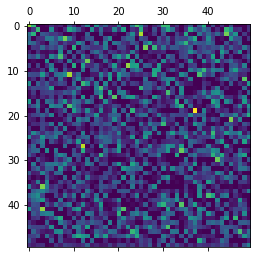

In [ ]:
plt.matshow(first_layer_activation[0, 30, :, :], cmap='viridis')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


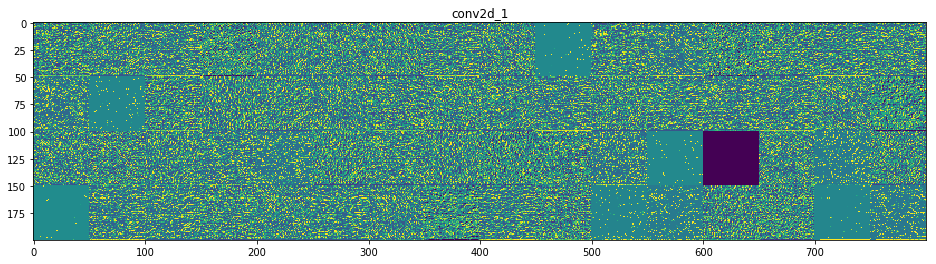

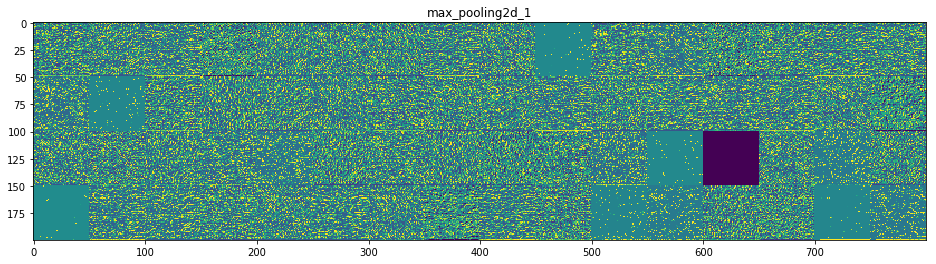

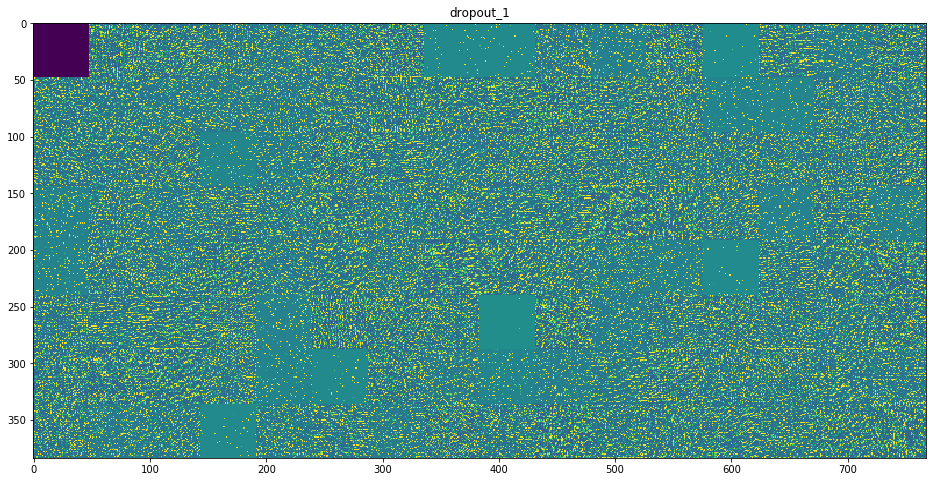

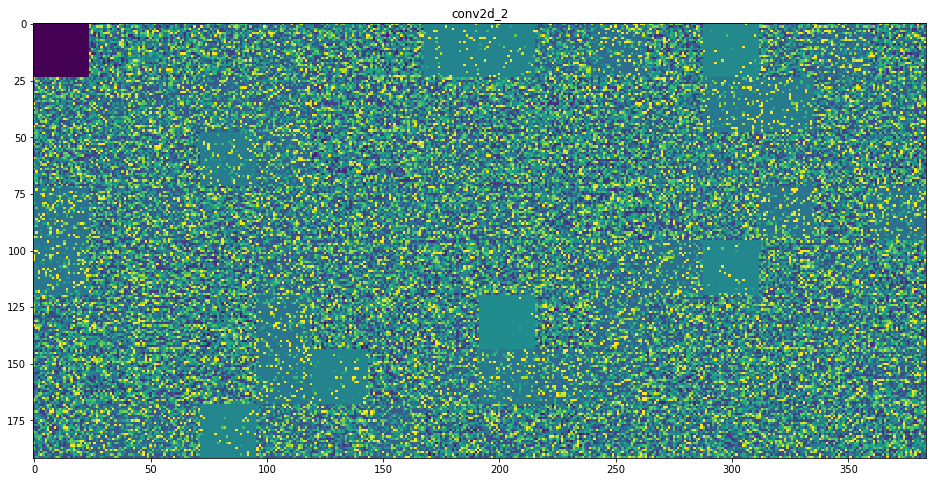

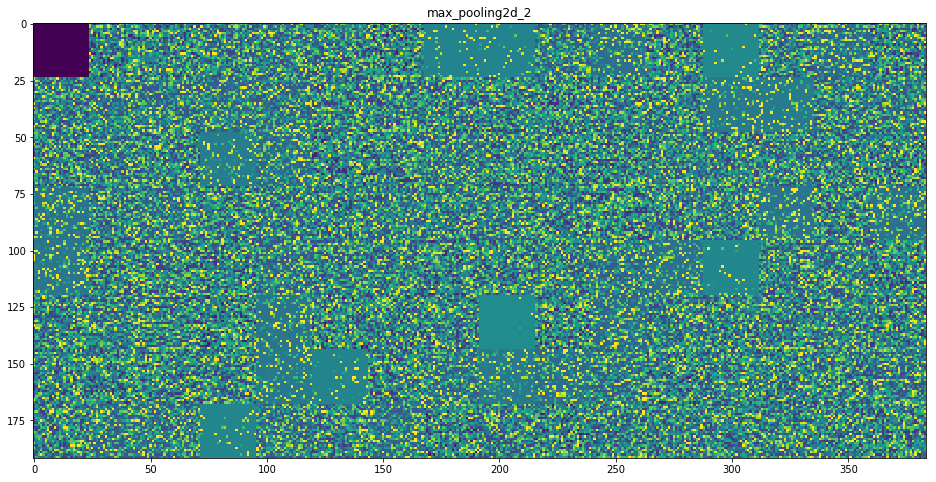

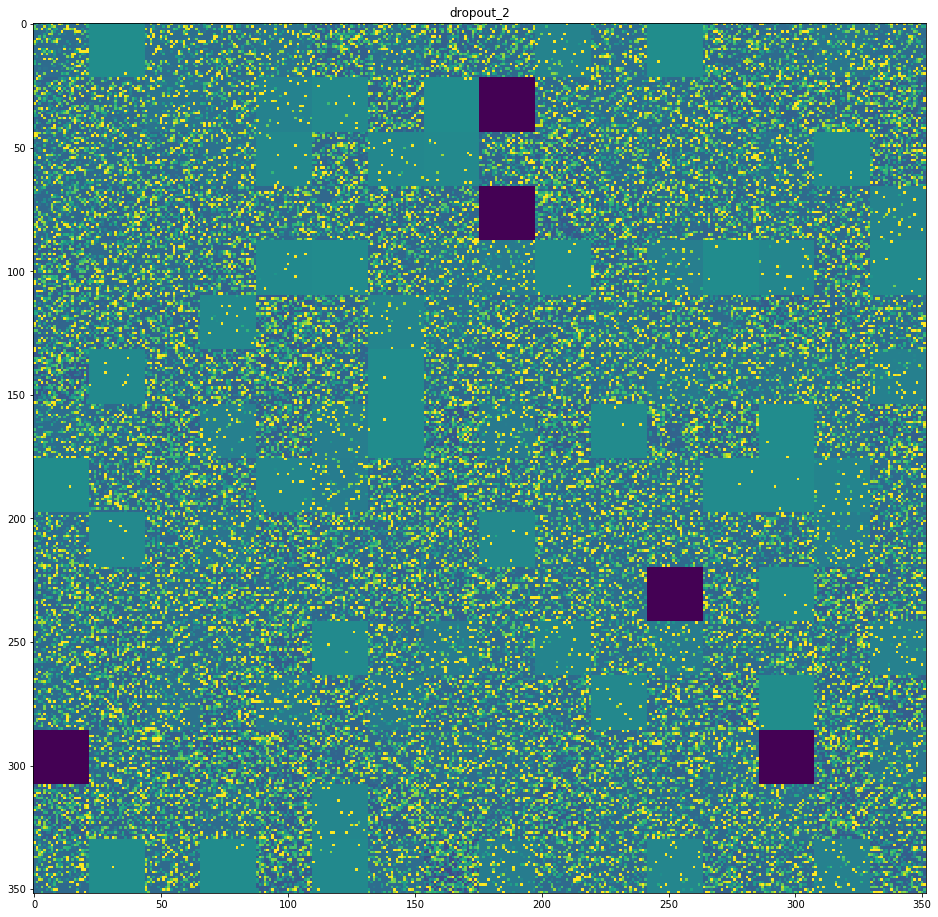

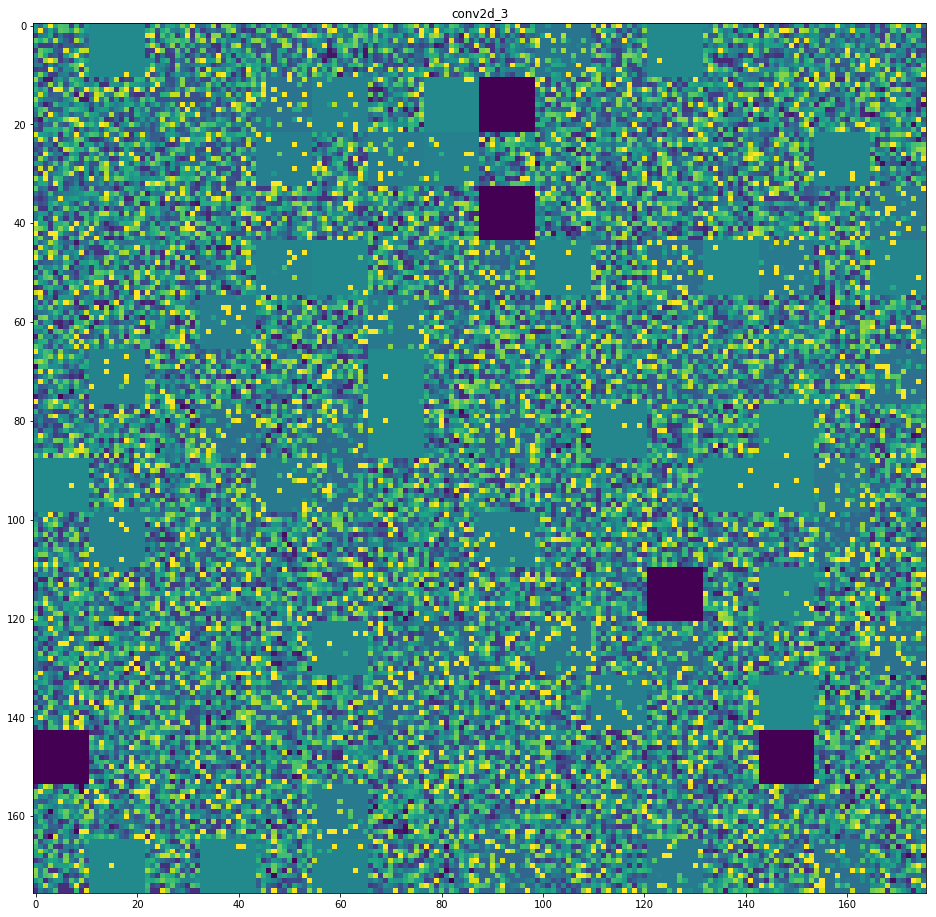

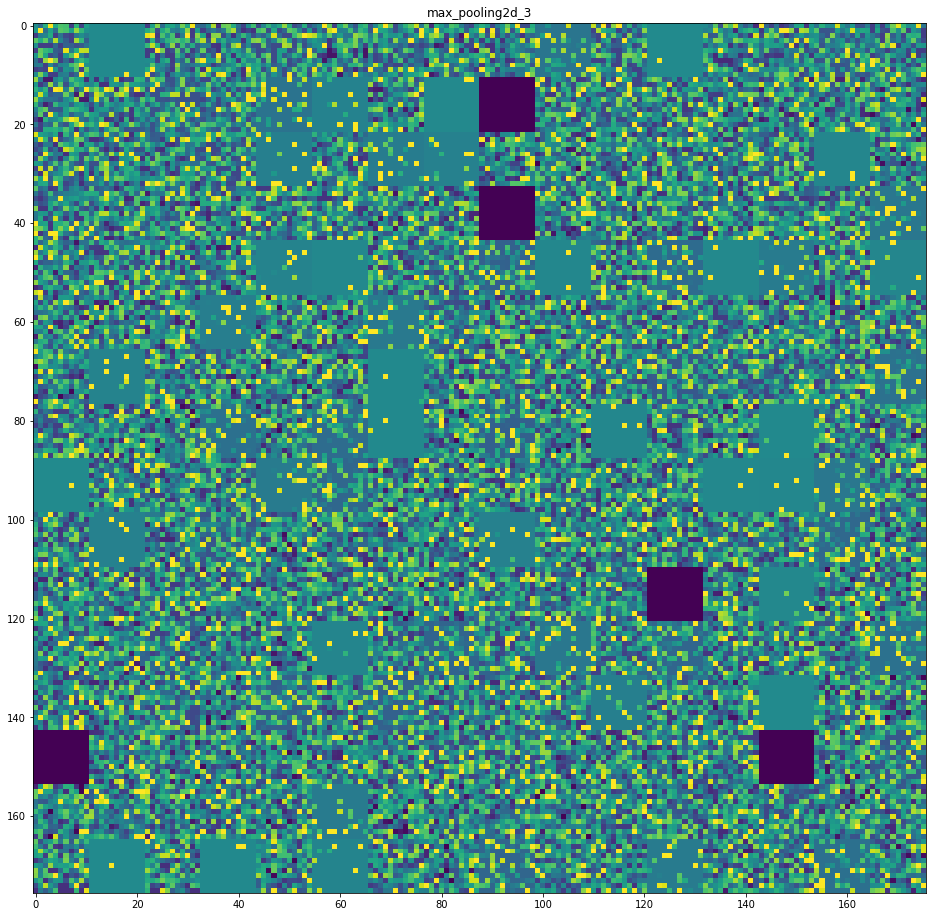

In [ ]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[2]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             col * images_per_row + row,
                                             :, :]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.savefig(layer_name)
    
plt.show()

In [ ]:
label[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)